In [1]:
# Load libraries
import pandas as pd
import numpy as np

# Load datasets
train_given = pd.read_csv('train.csv')
test_given = pd.read_csv('test.csv')

# Display the shape of the data
print(f"Training data shape: {train_given.shape}")
print(f"Testing data shape: {test_given.shape}")

# Display the first few rows of the training data
train_given.head()


Training data shape: (26637, 27)
Testing data shape: (5000, 26)


,ID,log_pSat_Pa,MW,NumOfAtoms,NumOfC,NumOfO,NumOfN,NumHBondDonors,NumOfConf,NumOfConfUsed,...,ester,ether (alicyclic),nitrate,nitro,aromatic hydroxyl,carbonylperoxynitrate,peroxide,hydroperoxide,carbonylperoxyacid,nitroester
0,0,-11.295070,224.016832,23,6,9,0,4,485.0,40.0,...,0,1,0,0,0,0,0,2,0,0
1,1,-4.782500,310.064845,35,9,10,2,1,236.0,40.0,...,0,0,2,0,0,0,0,1,0,0
2,2,-6.204319,368.033938,37,10,13,2,1,308.0,40.0,...,0,0,1,0,0,1,0,1,0,0
3,3,-9.672591,299.012475,29,7,12,1,4,769.0,3.0,...,0,0,1,0,0,0,0,1,1,0
4,4,-4.252058,202.011353,20,7,7,0,1,77.0,32.0,...,0,1,0,0,0,0,0,1,0,0


In [2]:
# Check missing values in training data
missing_values_train = train_given.isnull().sum()
print("\nMissing values in training data:")
print(missing_values_train[missing_values_train > 0])

# Check missing values in testing data
missing_values_test = test_given.isnull().sum()
print("\nMissing values in testing data:")
print(missing_values_test[missing_values_test > 0])



Missing values in training data:
parentspecies    210
dtype: int64

Missing values in testing data:
parentspecies    33
dtype: int64


C:\Users\Abdul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


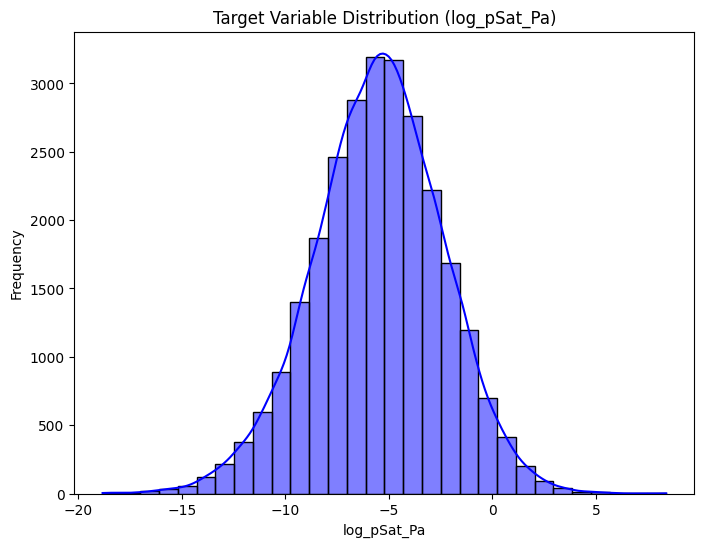

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(train_given['log_pSat_Pa'], kde=True, color='blue', bins=30)
plt.title('Target Variable Distribution (log_pSat_Pa)')
plt.xlabel('log_pSat_Pa')
plt.ylabel('Frequency')
plt.show()

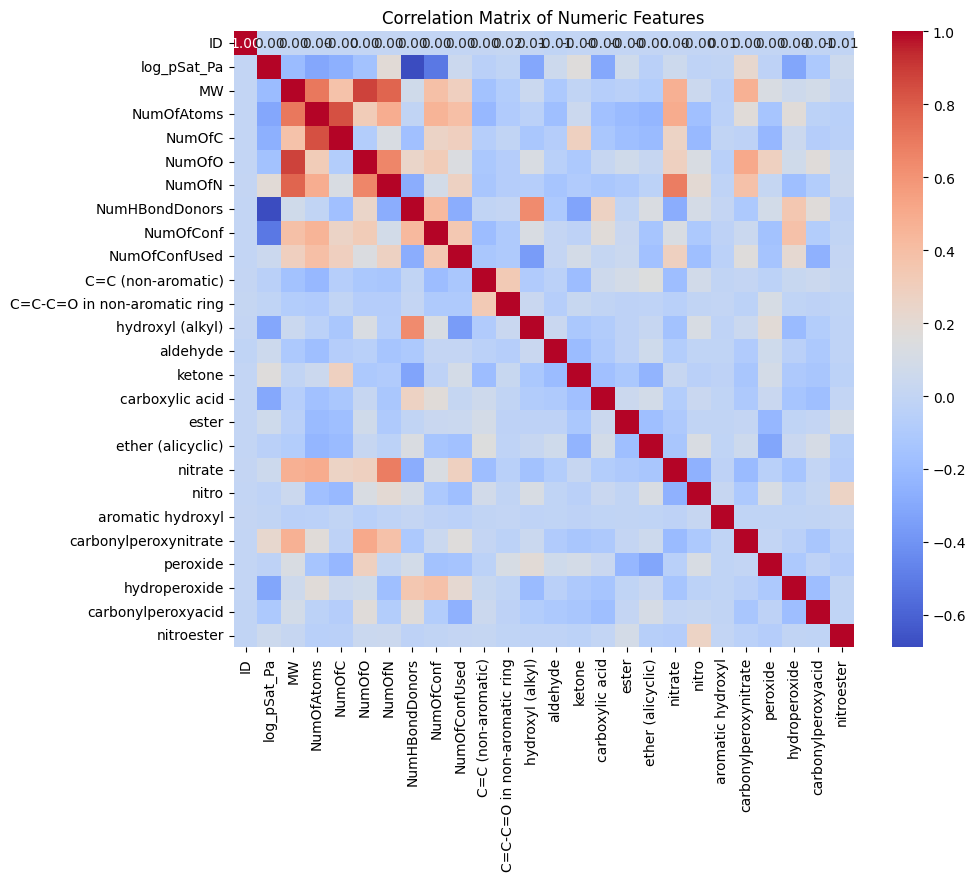

In [4]:
# Compute the correlation matrix for numeric columns
numeric_cols = train_given.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_given[numeric_cols].corr()

# Display the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [5]:
# Identify categorical columns
cat_col = train_given.select_dtypes(include=['object']).columns

# Display unique values for each categorical column
print("\nCategorical features and their unique value counts:")
for col in cat_col:
    print(f"{col}: {train_given[col].nunique()} unique values")



Categorical features and their unique value counts:
parentspecies: 7 unique values


C:\Users\Abdul\anaconda3\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


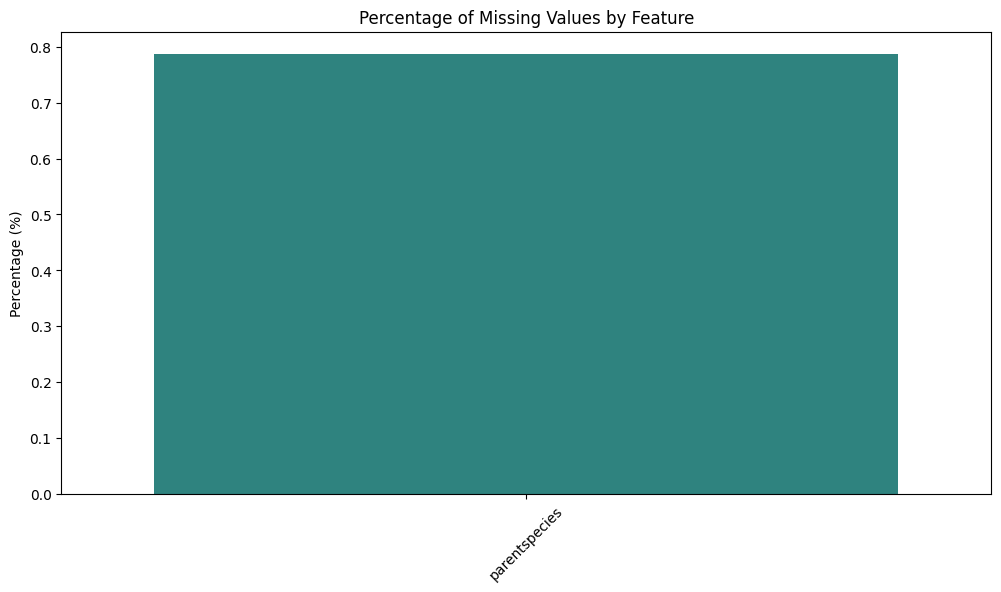

In [6]:
# Visualize missing values
plt.figure(figsize=(12, 6))
missing_percentage = (train_given.isnull().sum() / len(train_given)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')
plt.title('Percentage of Missing Values by Feature')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

# Decide filling strategies (optional - based on analysis):
# train_given['column_name'].fillna(value, inplace=True)
